In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
matplotlib.rcParams['axes.unicode_minus'] = False
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [3]:
# 데이터 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# train데이터 크기
train_input.shape

(60000, 28, 28)

In [5]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [6]:
# 합성곱 신경망 선언
model = keras.Sequential()

# 32개필터, 3은 (3,3) depth 1- 입력크기와 같음,  
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

# 최대풀링 - 사이즈 절반으로 줄임 - (28,28,32) -> (14,14,32)
model.add(keras.layers.MaxPooling2D(2))

# 1번 더 사용 크기는 64필터 - (14,14,32) -> 64
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

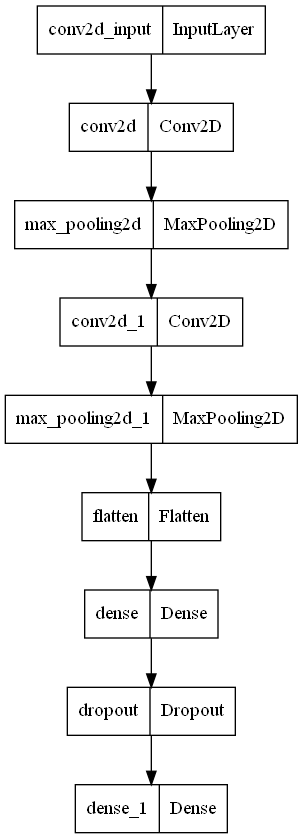

In [7]:
# 모델 input,output 정보
# 환경변수 시스템변수 등록
# C:\Program Files (x86)\Graphviz\bin
# C:\Program Files (x86)\Graphviz\bin\dot.exe
# https://free-eunb.tistory.com/14
from tensorflow.keras.utils import plot_model
plot_model(model)
# keras.utils.plot_model(model)

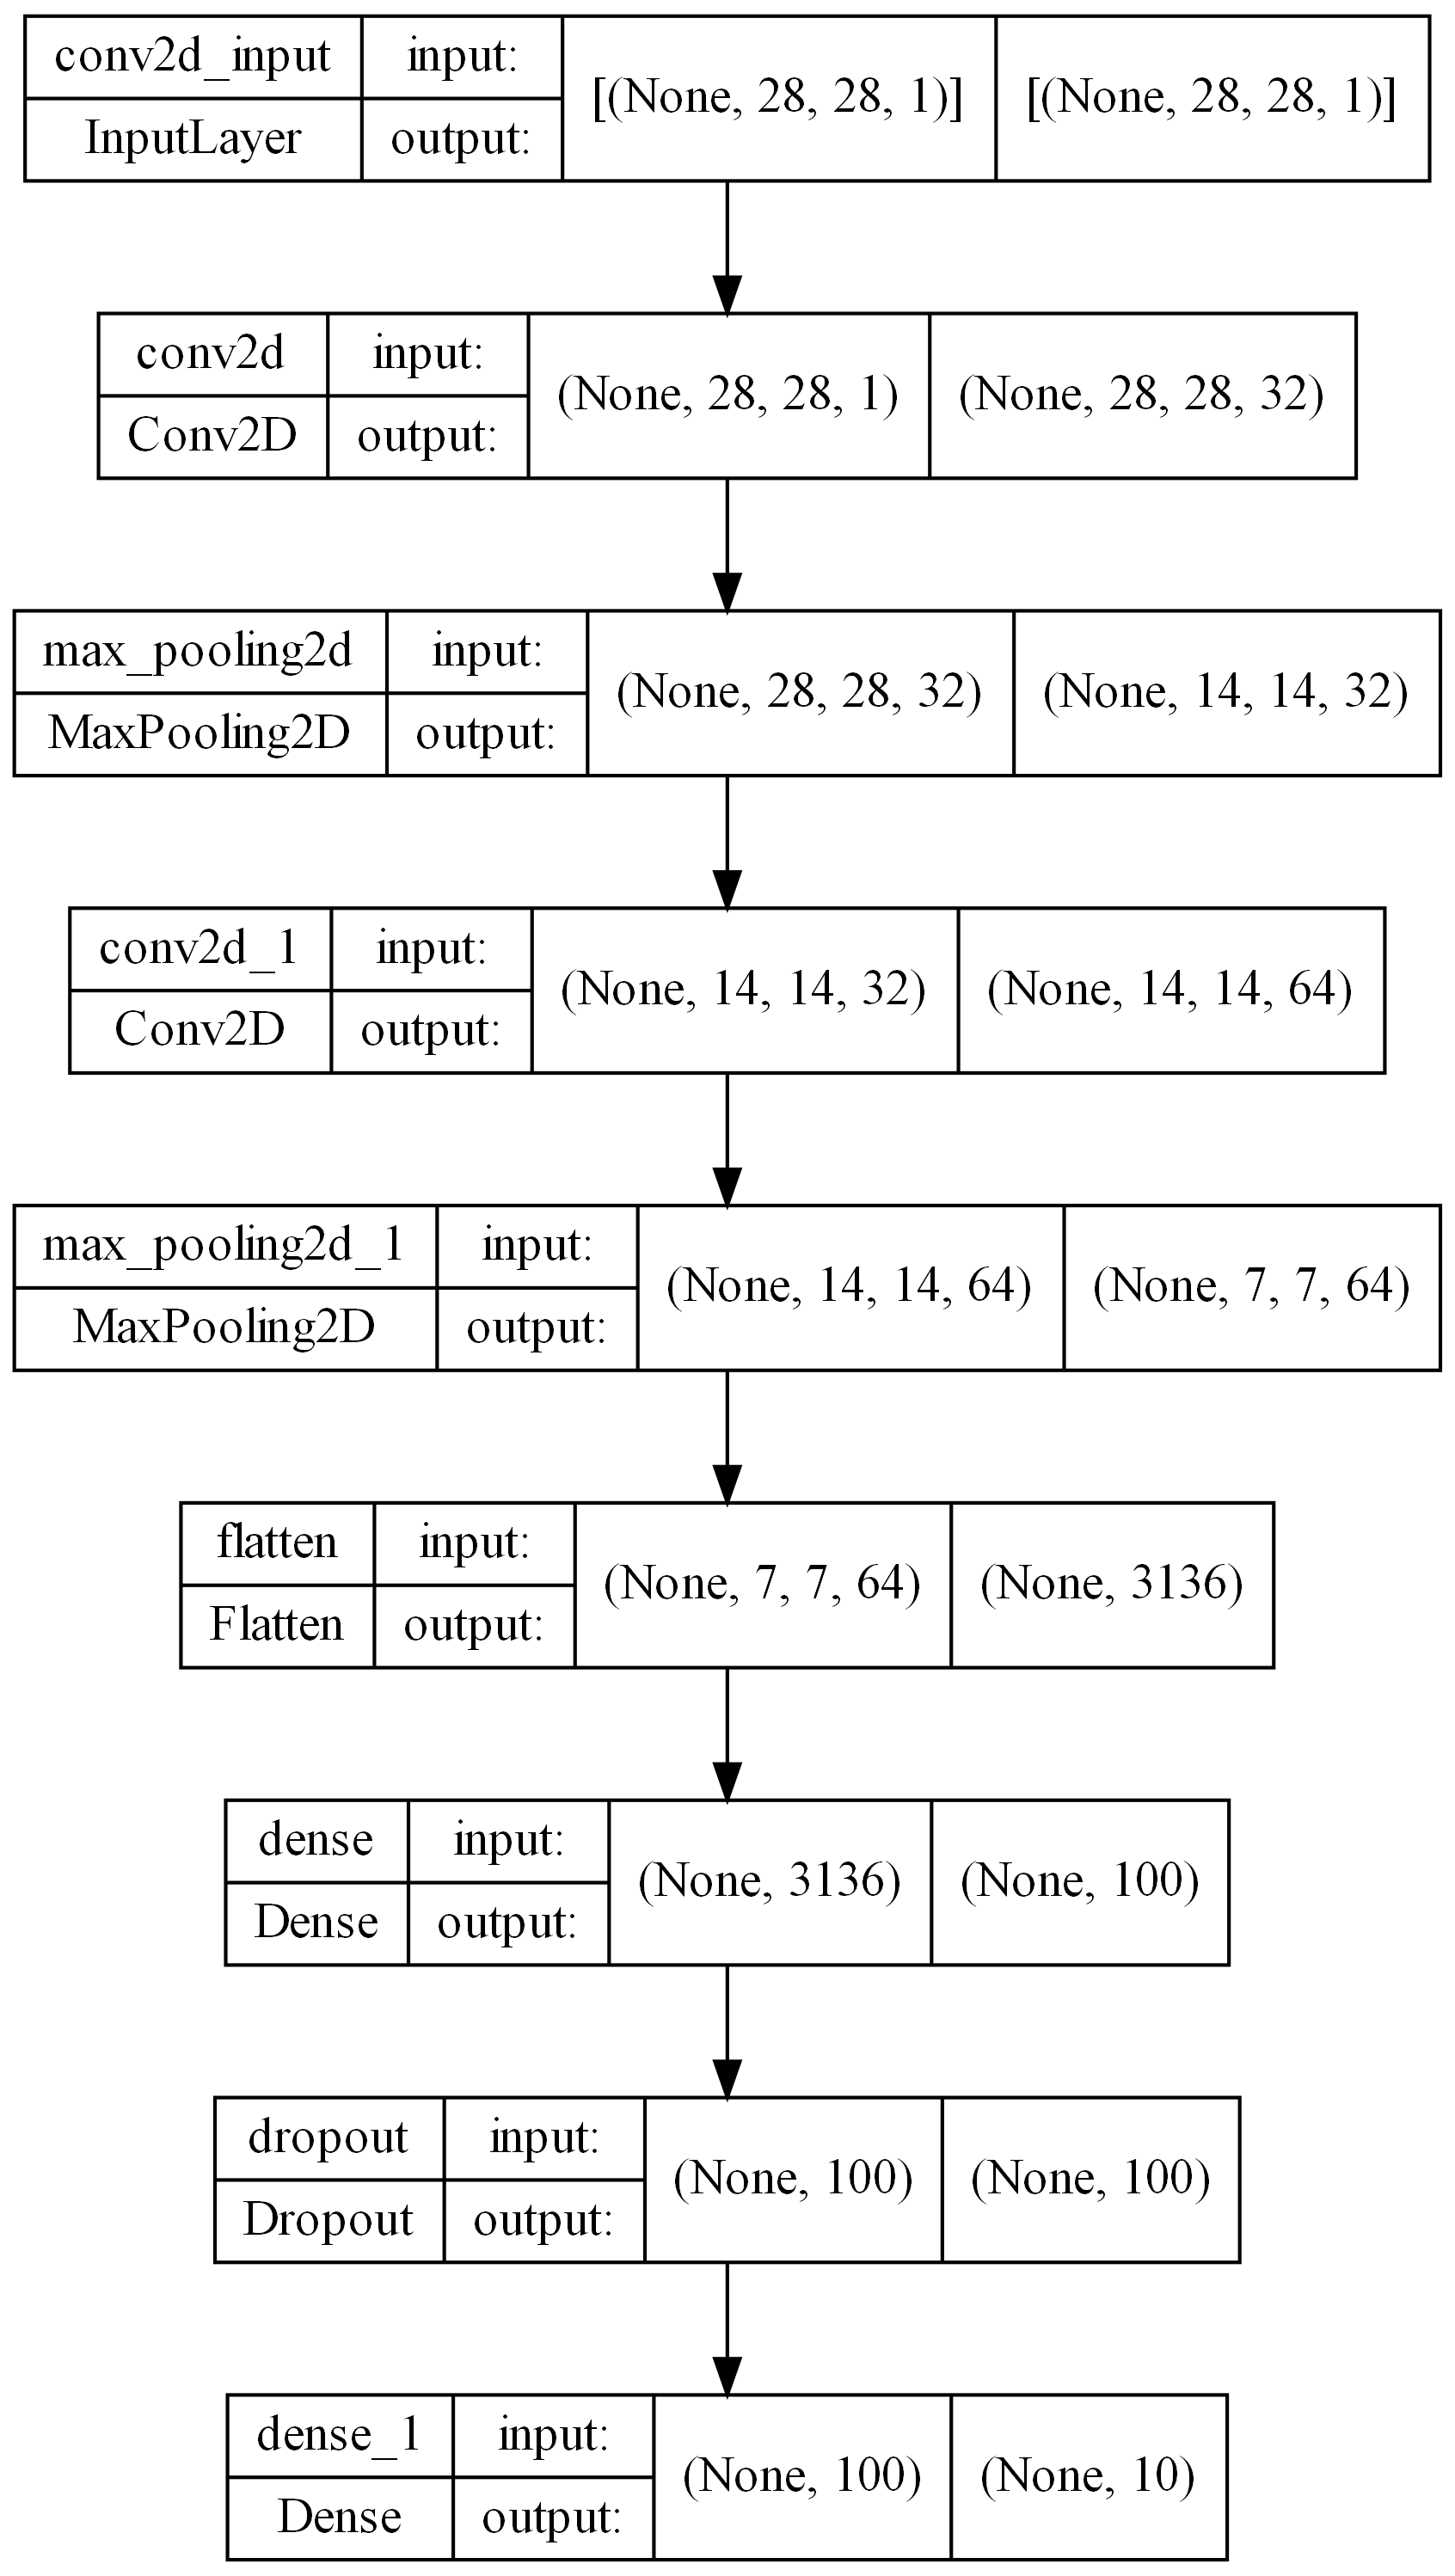

In [8]:
# 이미지 저장
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.5144 - accuracy: 0.8160 - val_loss: 0.3228 - val_accuracy: 0.8803
Epoch 2/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3426 - accuracy: 0.8779 - val_loss: 0.2835 - val_accuracy: 0.8933
Epoch 3/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2924 - accuracy: 0.8935 - val_loss: 0.2479 - val_accuracy: 0.9063
Epoch 4/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2617 - accuracy: 0.9048 - val_loss: 0.2328 - val_accuracy: 0.9145
Epoch 5/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2374 - accuracy: 0.9142 - val_loss: 0.2299 - val_accuracy: 0.9162
Epoch 6/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2180 - accuracy: 0.9205 - val_loss: 0.2402 - val_accuracy: 0.9101
Epoch 7/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1991 - accuracy: 0.9253 - val_loss: 0.2155 -

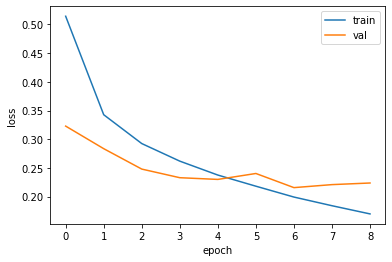

In [10]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
# 정확도
score = model.evaluate(val_scaled, val_target)
print("loss accuracy : ",score)

375/375 [==============================] - 2s 7ms/step - loss: 0.2155 - accuracy: 0.9210
loss accuracy :  [0.2155463844537735, 0.9210000038146973]


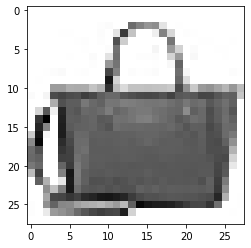

In [12]:
# test데이터 0번 출력
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
# 1번 예측 - 10개의 확률 출력
# 9번이 100% 예측
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.32536399e-18 8.35015756e-22 8.13429189e-22 1.20192056e-17
  1.00110965e-17 3.41908634e-16 2.50674665e-18 3.88434529e-19
  1.00000000e+00 2.14571103e-20]]


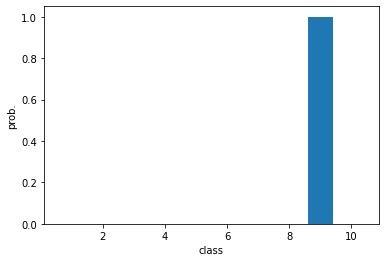

In [14]:
# 1-10까지 막대그래프 출력
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

# 예측 글자 출력 - 최대크기 위치 번호 출력 8 위치
# argmax 배열중 가장 큰 값 위치 출력
print(classes[np.argmax(preds)])

가방


In [16]:
# test데이터 1개 입력데이터 만듬
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 정확도
print(model.evaluate(test_scaled, test_target))

313/313 [==============================] - 3s 8ms/step - loss: 0.2429 - accuracy: 0.9153
[0.2428572028875351, 0.9153000116348267]


In [17]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[3.4860337e-12 2.5274076e-14 5.4005134e-11 3.2107541e-13 3.7346485e-13
  1.7241723e-06 1.1476452e-10 1.0642613e-05 4.3492786e-11 9.9998760e-01]]


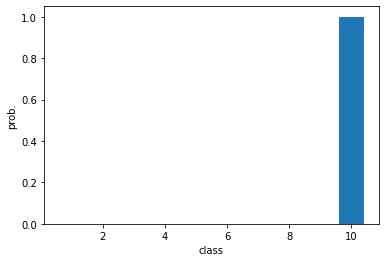

In [18]:
# 1-10까지 막대그래프 출력
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

# 예측 글자 출력 - 최대크기 위치 번호 출력 8 위치
# argmax 배열중 가장 큰 값 위치 출력
print(classes[np.argmax(preds)])

앵클 부츠
